# Importing Packages

In [20]:
# Instalando os pacotes necessários
from google.colab import drive
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

# Reading Dataset and Analyzing it

In [21]:
# Conectando ao Google Drive e efetuando a leitura do Dataset
drive.mount('/content/drive')

dataframe = pd.read_excel("/content/drive/MyDrive/VolumetriaM8/db.xlsx")
dataframe.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0,Supplier Name,Normalized Supplier Name,Parent Supplier Name,Region,Requestor Name,Preparer Name,Level 1,Level 2,Level 3,...,Cost Center (Level 6),GL Desc (Level 4),GL Desc (Level 5),GL Desc (Level 6),Invoice ID,Invoice Number,Invoice Source,"Month, Day, Year of Payment Date",PO Number,Amount (USD)
0,NaN,1ST AVE MACHINE USA INC,1ST AVE MACHINE USA INC,1st Ave Machine USA Inc.,NORAM,NaN,NaN,"Sales, Marketing & Events",Original Content,Original Content,...,Parent for Cost Center,Current Liabilities,Total Liabilities,Total Liabilities & Shareholders' Equity,300002847701042,DDRMETAVERSEAWTY002R,SIMANUAL,2023-08-10,NaN,231826.73
1,NaN,1ST AVE MACHINE USA INC,1ST AVE MACHINE USA INC,1st Ave Machine USA Inc.,NORAM,Cara Brann,Jessica Shimshak,"Sales, Marketing & Events",Original Content,Original Content,...,Parent for Cost Center,Creative services,Opex w/o Allocations & Interco,Operating Expenses w/o Allocations,300002890508241,FBAPPRFP001,SUPP_CONNECT,2023-09-28,7.000079e+10,349101.75
2,NaN,1ST AVE MACHINE USA INC,1ST AVE MACHINE USA INC,1st Ave Machine USA Inc.,NORAM,Chloe Kwock,Nicole Franco,"Sales, Marketing & Events",Original Content,Original Content,...,Parent for Cost Center,Marketing Materials,Opex w/o Allocations & Interco,Operating Expenses w/o Allocations,300002731100946,AWTYCASESTUDY005,SUPP_CONNECT,2023-05-13,7.000067e+10,6936.00
3,NaN,1ST AVE MACHINE USA INC,1ST AVE MACHINE USA INC,1st Ave Machine USA Inc.,NORAM,Chloe Kwock,Princess Costello,"Sales, Marketing & Events",Original Content,Original Content,...,Parent for Cost Center,Consultants,Opex w/o Allocations & Interco,Operating Expenses w/o Allocations,300002818756646,DCRMETAVERSEAWTY002,SIMANUAL,2023-08-10,7.000049e+10,-231826.73
4,NaN,1ST AVE MACHINE USA INC,1ST AVE MACHINE USA INC,1st Ave Machine USA Inc.,NORAM,Jess Jabbar,Princess Costello,"Sales, Marketing & Events",Original Content,Original Content,...,Parent for Cost Center,Other Marketing,Opex w/o Allocations & Interco,Operating Expenses w/o Allocations,300002613103245,AWTYCASESTUDY001,SUPP_CONNECT,2023-02-16,7.000063e+10,55000.00


In [22]:
# Exibindo a dimensionalidade do Dataset
data_shape = dataframe.shape
print("Dimensão do dataset: ", data_shape)

Dimensão do dataset:  (1048575, 26)


In [23]:
# Exibindo o título das colunas existentes no Dataset
column_headers = list(dataframe.columns.values)
print("Colunas do dataset: ", column_headers)

Colunas do dataset:  ['Unnamed: 0', 'Supplier Name', 'Normalized Supplier Name', 'Parent Supplier Name', 'Region', 'Requestor Name', 'Preparer Name', 'Level 1', 'Level 2', 'Level 3', 'Business Unit', 'Legal Entity', 'Cost Center', 'Cost Center (Base Level)', 'Cost Center (Level 4)', 'Cost Center (Level 5)', 'Cost Center (Level 6)', 'GL Desc (Level 4)', 'GL Desc (Level 5)', 'GL Desc (Level 6)', 'Invoice ID', 'Invoice Number', 'Invoice Source', 'Month, Day, Year of Payment Date', 'PO Number', 'Amount (USD)']


In [24]:
# Selecionando as partes que irão dividir o Dataset
num_parts = 10

# Calculando o número de linhas por parte
num_rows = len(dataframe)
rows_per_part = num_rows // num_parts

# Lista para armazenar as partes divididas
dataframes = []

# Dividindo o DataFrame em partes
for i in range(num_parts):
    start = i * rows_per_part
    end = (i + 1) * rows_per_part if i < num_parts - 1 else num_rows
    part = dataframe.iloc[start:end]
    dataframes.append(part)

    # OBS: Para referenciar o Dataset particionado, basta utilizar dataframes[número da partição]

# Region Insights

<ipython-input-25-7bbc54c84481>:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(top_supplier_by_region.columns))


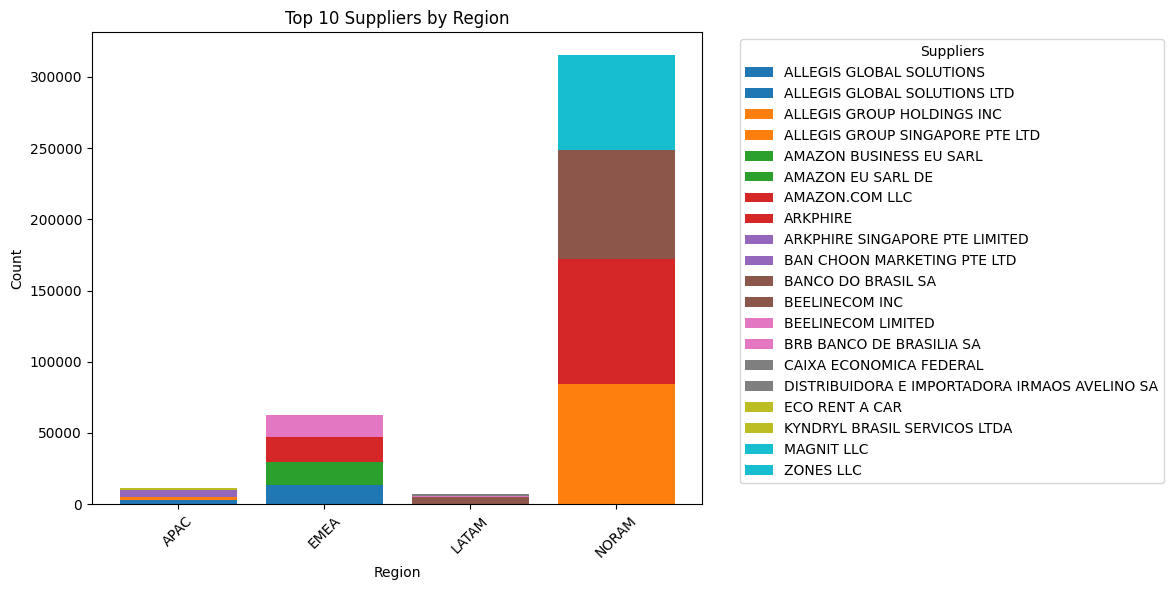

In [25]:
# Pegando os 10 principais fornecedores em cada região
top_supplier_by_region = dataframe.groupby('Region')['Supplier Name'].value_counts().groupby(level=0).nlargest(5)

# Reorganizando os dados em um DataFrame para facilitar a plotagem
top_supplier_by_region = top_supplier_by_region.reset_index(level=0, drop=True).unstack().fillna(0)

# Configuração das cores para cada fornecedor
colors = plt.cm.get_cmap('tab10', len(top_supplier_by_region.columns))

# Criando o gráfico de barras "empilhadas"
plt.figure(figsize=(12, 6))
bottom = [0] * len(top_supplier_by_region)

for supplier, color in zip(top_supplier_by_region.columns, colors(range(len(top_supplier_by_region.columns)))):
    plt.bar(top_supplier_by_region.index, top_supplier_by_region[supplier], bottom=bottom, label=supplier, color=color)
    bottom = [sum(x) for x in zip(bottom, top_supplier_by_region[supplier])]

plt.title('Top 10 Suppliers by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Suppliers', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Exibindo o gráfico
plt.show()


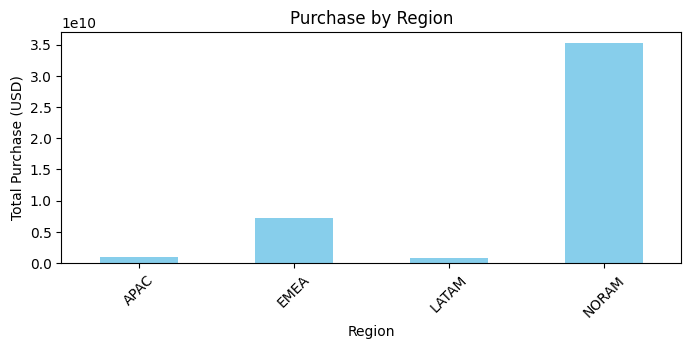

In [26]:
# Limpando a formatação da coluna 'Amount (USD)' para converter em valores numéricos
dataframe['Amount (USD)'] = dataframe['Amount (USD)'].replace('[\$,]', '', regex=True).astype(float)

# Criando o gráfico
plt.figure(figsize=(10, 6))
purchase_by_region = dataframe.groupby('Region')['Amount (USD)'].sum()
purchase_by_region.plot(kind='bar', color="skyblue")
plt.title('Purchase by Region')
plt.xlabel('Region')
plt.ylabel('Total Purchase (USD)')
plt.xticks(rotation=45)
plt.gcf().set_size_inches(8, 3)

# Exibindo o gráfico
plt.show()

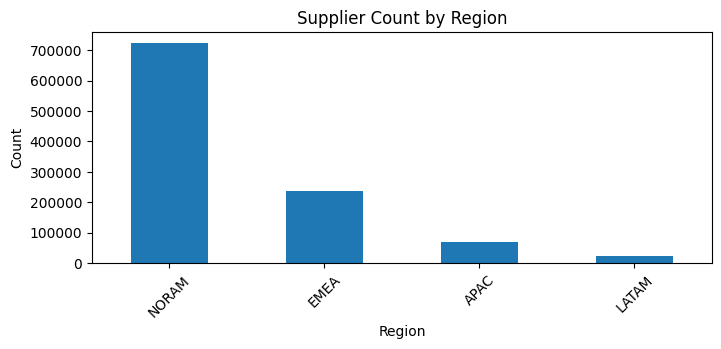

In [27]:
plt.figure(figsize=(10, 6))
dataframe['Region'].value_counts().plot(kind='bar')
plt.title('Supplier Count by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.gcf().set_size_inches(8, 3)

plt.show()

<ipython-input-56-d9c4ad138545>:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(top_level_1_by_region.columns))


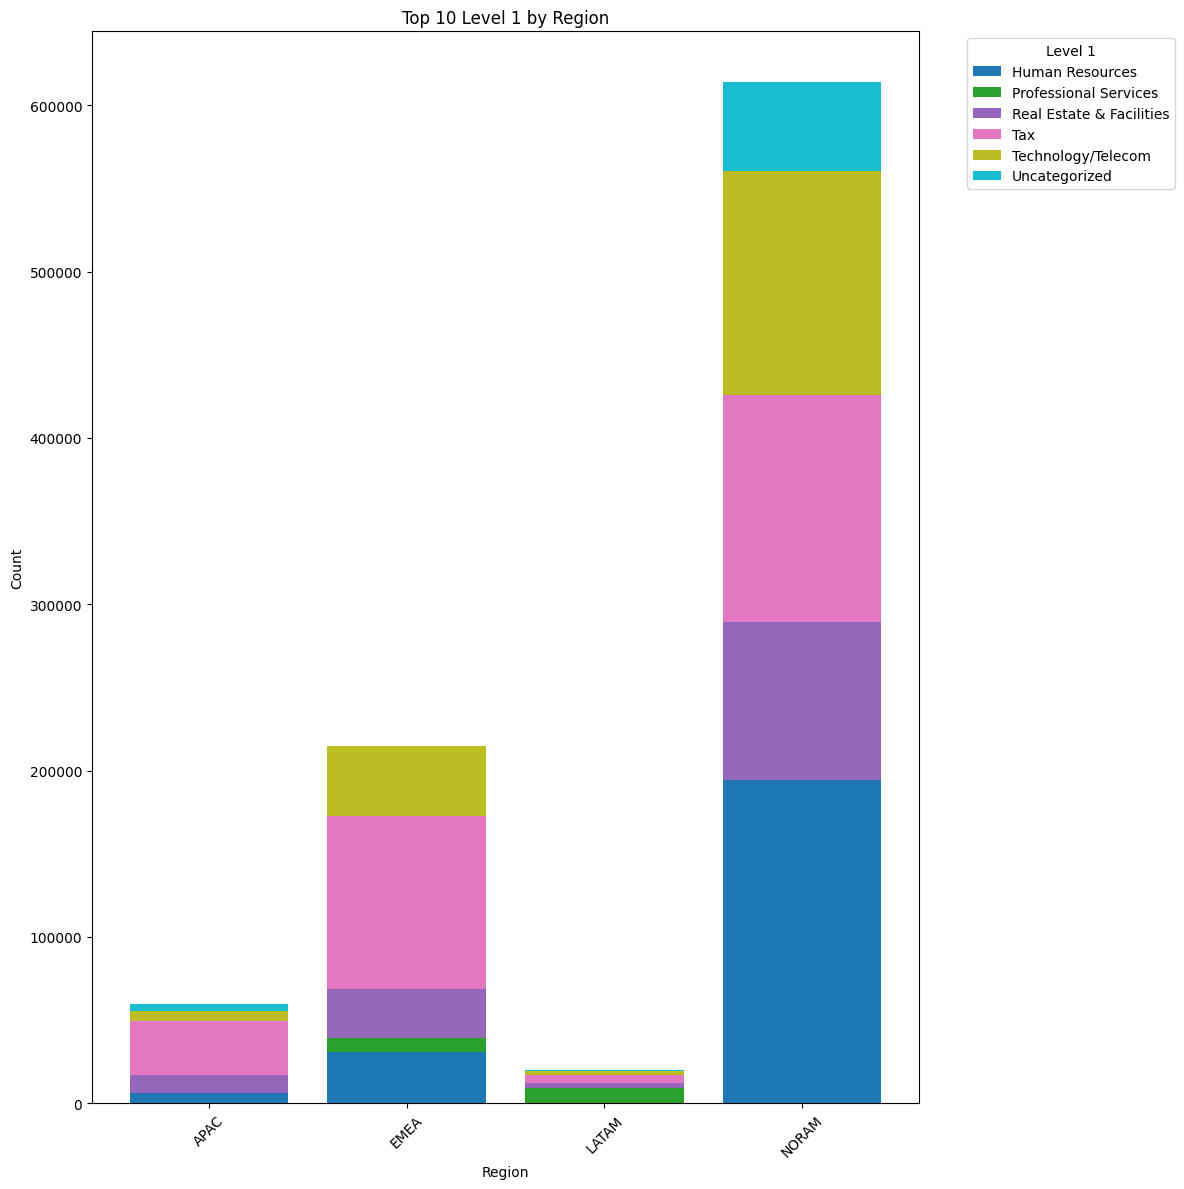

In [56]:
# Pegando os 10 principais fornecedores em cada região
top_level_1_by_region = dataframe.groupby('Region')['Level 1'].value_counts().groupby(level=0).nlargest(5)

# Reorganizando os dados em um DataFrame para facilitar a plotagem
top_level_1_by_region = top_level_1_by_region.reset_index(level=0, drop=True).unstack().fillna(0)

# Configuração das cores para cada fornecedor
colors = plt.cm.get_cmap('tab10', len(top_level_1_by_region.columns))

# Criando o gráfico de barras "empilhadas"
plt.figure(figsize=(12, 12))
bottom = [0] * len(top_level_1_by_region)

for level_1, color in zip(top_level_1_by_region.columns, colors(range(len(top_level_1_by_region.columns)))):
    plt.bar(top_supplier_by_region.index, top_level_1_by_region[level_1], bottom=bottom, label=level_1, color=color)
    bottom = [sum(x) for x in zip(bottom, top_level_1_by_region[level_1])]

plt.title('Top 10 Level 1 by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Level 1', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Exibindo o gráfico
plt.show()

<ipython-input-57-da8732bb7672>:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(top_level_2_by_region.columns))


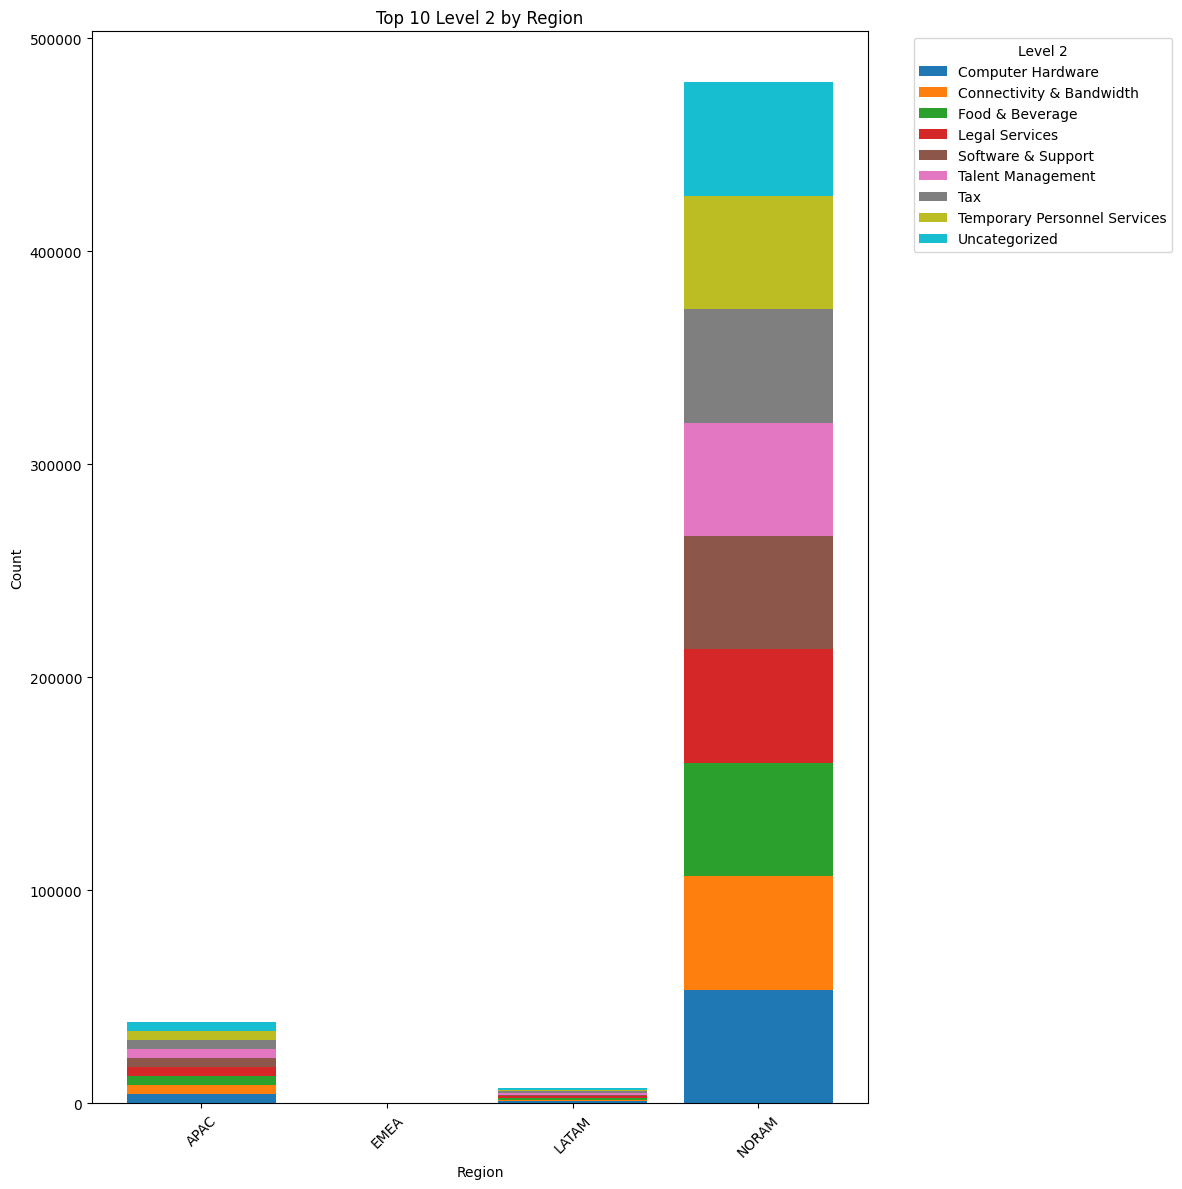

In [57]:
# Pegando os 10 principais fornecedores em cada região
top_level_2_by_region = dataframe.groupby('Region')['Level 2'].value_counts().groupby(level=0).nlargest(5)

# Reorganizando os dados em um DataFrame para facilitar a plotagem
top_level_2_by_region = top_level_2_by_region.reset_index(level=0, drop=True).unstack().fillna(0)

# Configuração das cores para cada fornecedor
colors = plt.cm.get_cmap('tab10', len(top_level_2_by_region.columns))

# Criando o gráfico de barras "empilhadas"
plt.figure(figsize=(12, 12))
bottom = [0] * len(top_level_2_by_region)

for level_2, color in zip(top_level_2_by_region.columns, colors(range(len(top_level_2_by_region.columns)))):
    plt.bar(top_supplier_by_region.index, top_level_2_by_region[level_1], bottom=bottom, label=level_2, color=color)
    bottom = [sum(x) for x in zip(bottom, top_level_2_by_region[level_1])]

plt.title('Top 10 Level 2 by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Level 2', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Exibindo o gráfico
plt.show()

# Amount Insights

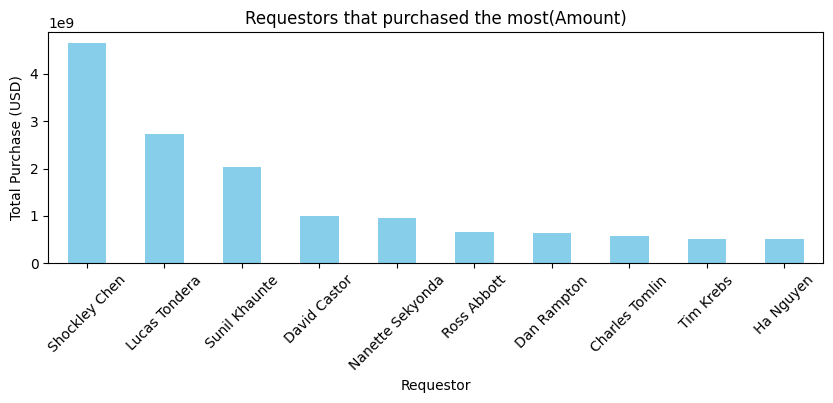

In [28]:
# Limpando a formatação da coluna 'Amount (USD)' para converter em valores numéricos
dataframe['Amount (USD)'] = dataframe['Amount (USD)'].replace('[\$,]', '', regex=True).astype(float)

# Criando o gráfico
plt.figure(figsize=(10, 6))
purchase_by_requestor = dataframe.groupby('Requestor Name')['Amount (USD)'].sum().nlargest(10)
purchase_by_requestor.plot(kind='bar', color="skyblue")
plt.title('Requestors that purchased the most(Amount)')
plt.xlabel('Requestor')
plt.ylabel('Total Purchase (USD)')
plt.xticks(rotation=45)
plt.gcf().set_size_inches(10, 3)

# Exibindo o gráfico
plt.show()

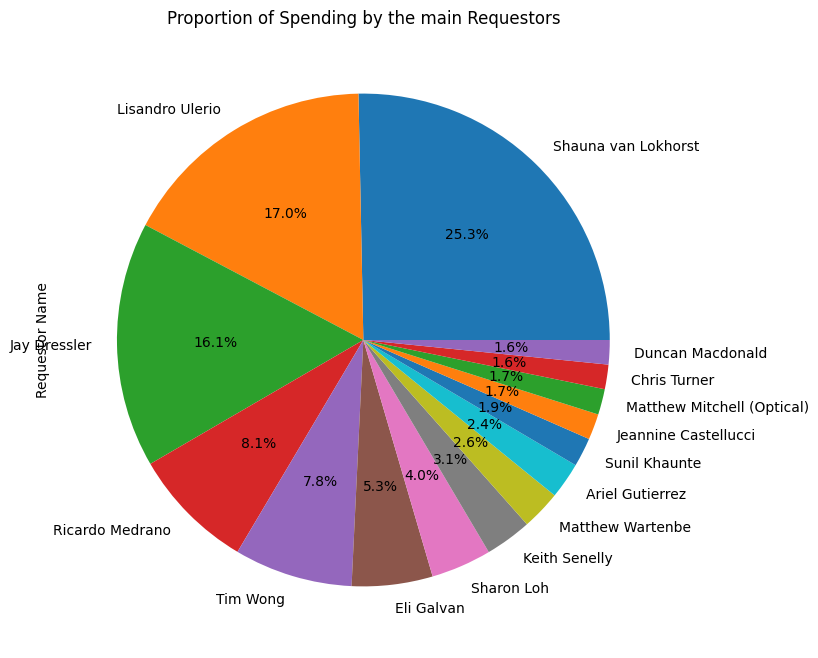

In [64]:
# Contagem de fornecedores
requestor_counts = dataframe['Requestor Name'].value_counts()

# Selecionar os 15 principais fornecedores
top_requestor = requestor_counts.nlargest(15)

# Restringir o DataFrame aos 15 principais fornecedores
dataframe_filtered = dataframe[dataframe['Requestor Name'].isin(top_requestor.index)]

# Exemplo: Proporção de gastos pelos 15 principais fornecedores
plt.figure(figsize=(8, 8))
dataframe_filtered['Requestor Name'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of Spending by the main Requestors')
plt.show()


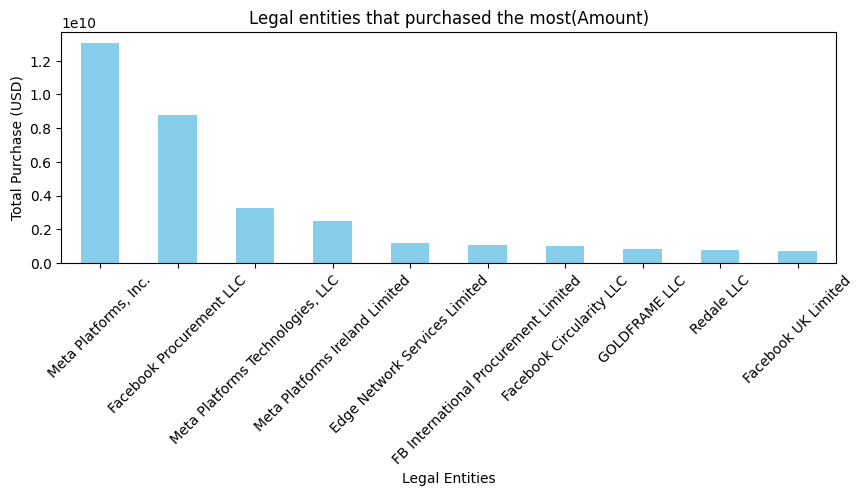

In [29]:
# Limpando a formatação da coluna 'Amount (USD)' para converter em valores numéricos
dataframe['Amount (USD)'] = dataframe['Amount (USD)'].replace('[\$,]', '', regex=True).astype(float)

# Criando o gráfico
plt.figure(figsize=(10, 6))
purchase_by_legal_entity = dataframe.groupby('Legal Entity')['Amount (USD)'].sum().nlargest(10)
purchase_by_legal_entity.plot(kind='bar', color="skyblue")
plt.title('Legal entities that purchased the most(Amount)')
plt.xlabel('Legal Entities')
plt.ylabel('Total Purchase (USD)')
plt.xticks(rotation=45)
plt.gcf().set_size_inches(10, 3)

# Exibindo o gráfico
plt.show()

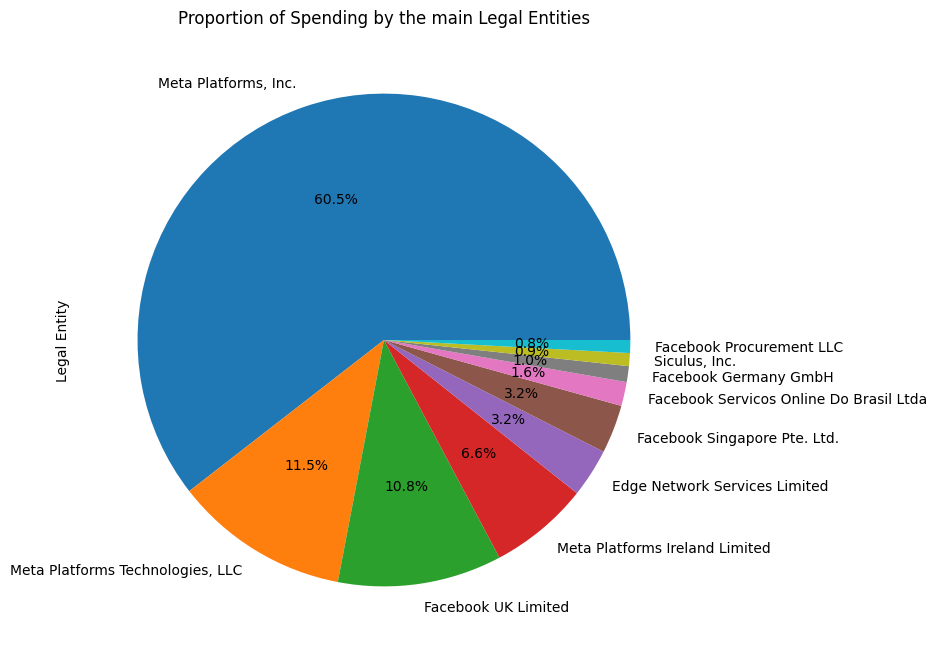

In [62]:
# Contagem de Entidades Legais
legal_entities_counts = dataframe['Legal Entity'].value_counts()

# Selecionar os 15 principais Entidades Legais
top_legal_entities = legal_entities_counts.nlargest(10)

# Restringir o DataFrame aos 10 principais Entidades Legais
dataframe_filtered = dataframe[dataframe['Legal Entity'].isin(top_legal_entities.index)]

# Criando o gráfico de barras para as 10 categorias com maior arrecadação
plt.figure(figsize=(8, 8))
dataframe_filtered['Legal Entity'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of Spending by the main Legal Entities')
plt.show()


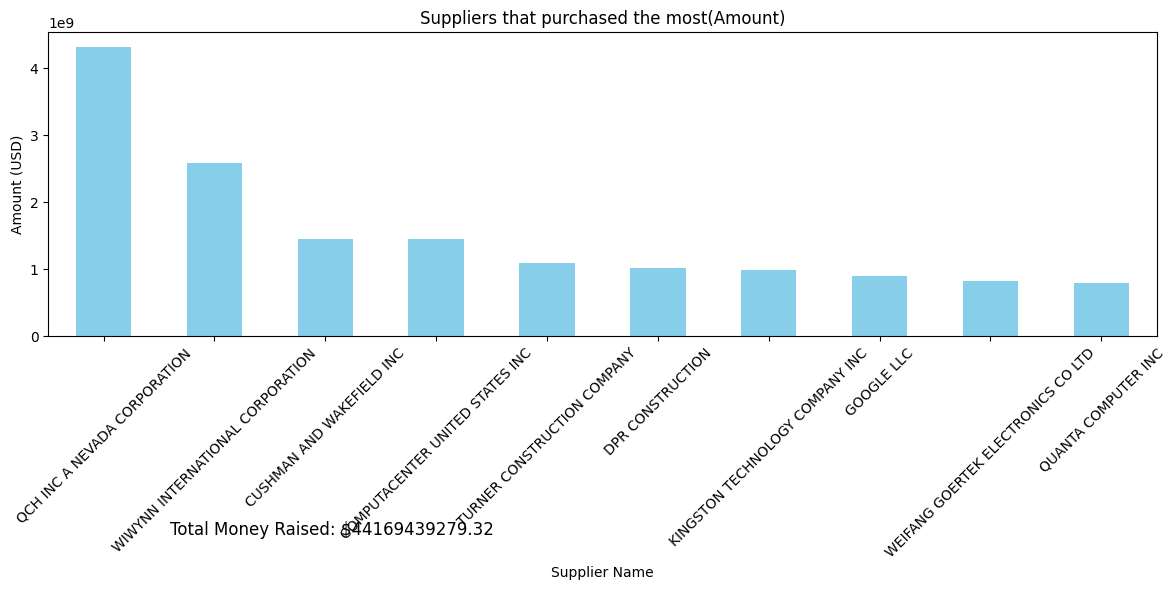

In [33]:
dataframe['Amount (USD)'] = dataframe['Amount (USD)'].replace('[\$,]', '', regex=True).astype(float)

# Soma dos valores em dinheiro
total_raised = dataframe['Amount (USD)'].sum()

# Agrupando por categoria e calculando a soma de dinheiro para cada categoria
raised_by_category = dataframe.groupby('Supplier Name')['Amount (USD)'].sum().sort_values(ascending=False).head(10)

# Criando o gráfico de barras para as 10 categorias com maior arrecadação
plt.figure(figsize=(12, 6))
raised_by_category.plot(kind='bar', color='skyblue')
plt.title('Suppliers that purchased the most(Amount)')
plt.xlabel('Supplier Name')
plt.ylabel('Amount (USD)')
plt.xticks(rotation=45)

# Mostrando o total arrecadado
plt.figtext(0.15, 0.1, f'Total Money Raised: ${total_raised:.2f}', fontsize=12)

# Exibindo o gráfico
plt.tight_layout()
plt.show()

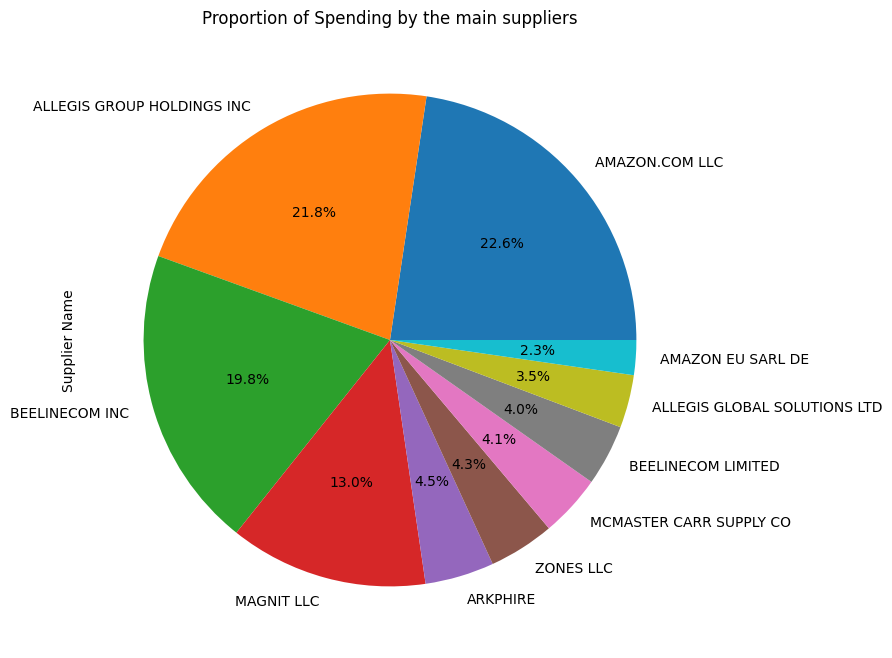

In [63]:
# Contagem de fornecedores
supplier_counts = dataframe['Supplier Name'].value_counts()

# Selecionar os 15 principais fornecedores
top_suppliers = supplier_counts.nlargest(10)

# Restringir o DataFrame aos 15 principais fornecedores
dataframe_filtered = dataframe[dataframe['Supplier Name'].isin(top_suppliers.index)]

# Exemplo: Proporção de gastos pelos 15 principais fornecedores
plt.figure(figsize=(8, 8))
dataframe_filtered['Supplier Name'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of Spending by the main suppliers')
plt.show()


# Time Series

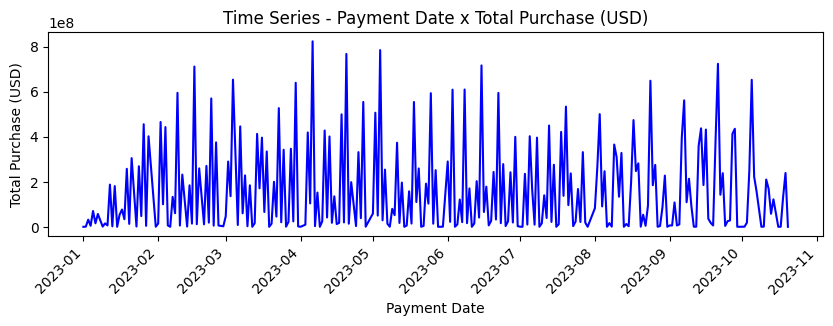

In [30]:
# Limpando a formatação da coluna 'Amount (USD)' para converter em valores numéricos
dataframe['Amount (USD)'] = dataframe['Amount (USD)'].replace('[\$,]', '', regex=True).astype(float)

# Criando o gráfico
plt.figure(figsize=(12, 6))
dataframe['Month, Day, Year of Payment Date'] = pd.to_datetime(dataframe['Month, Day, Year of Payment Date'])
time_series = dataframe.groupby('Month, Day, Year of Payment Date')['Amount (USD)'].sum()
time_series.plot(kind='line', color='blue')
plt.title('Time Series - Payment Date x Total Purchase (USD)')
plt.xlabel('Payment Date')
plt.ylabel('Total Purchase (USD)')
plt.xticks(rotation=45)
plt.gcf().set_size_inches(10, 3)

# Exibindo o gráfico
plt.show()

# Ocurrency Insights

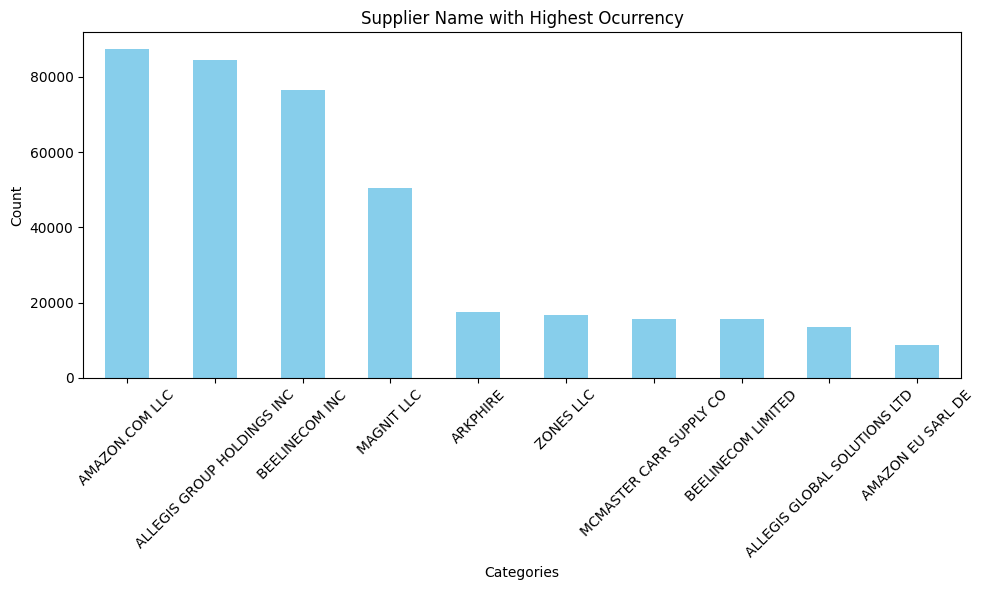

In [32]:
# Contagem das categorias
categoria_contagem = dataframe['Supplier Name'].value_counts()

# Seleciona as 10 categorias com maior ocorrência
top_10_categorias = categoria_contagem.head(10)

# Cria um gráfico de barras
plt.figure(figsize=(10, 6))
top_10_categorias.plot(kind='bar', color='skyblue')
plt.title('Supplier Name with Highest Ocurrency')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotação dos rótulos no eixo x para melhor legibilidade
plt.tight_layout()

# Mostra o gráfico
plt.show()

# Levels Insights

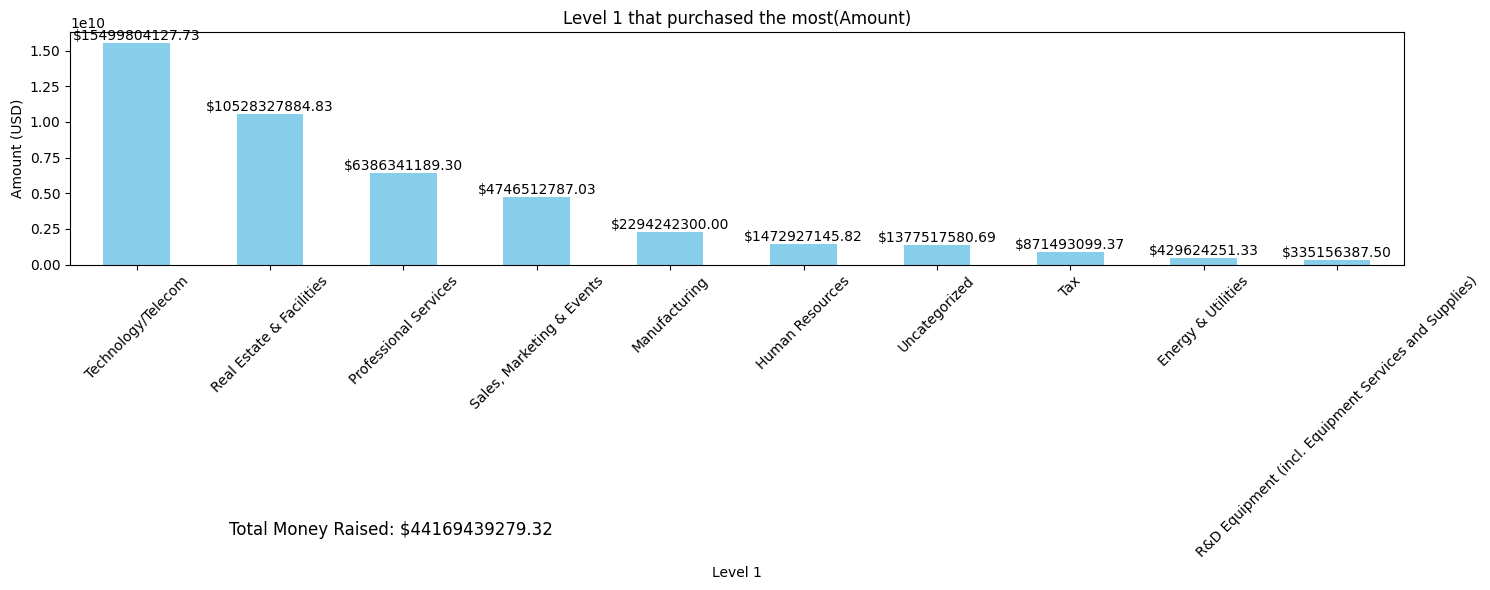

In [45]:
dataframe['Amount (USD)'] = dataframe['Amount (USD)'].replace('[\$,]', '', regex=True).astype(float)

# Soma dos valores em dinheiro
total_raised = dataframe['Amount (USD)'].sum()

# Agrupando por categoria e calculando a soma de dinheiro para cada categoria
raised_by_category = dataframe.groupby('Level 1')['Amount (USD)'].sum().sort_values(ascending=False).head(10)

bar_width = 0.2

# Criando o gráfico de barras para as 10 categorias com maior arrecadação
plt.figure(figsize=(15, 6))
raised_by_category.plot(kind='bar', color='skyblue')
plt.title('Level 1 that purchased the most(Amount)')
plt.xlabel('Level 1')
plt.ylabel('Amount (USD)')
plt.xticks(rotation=45)

# Acrescentando uma marcação para o valor de cada barra no eixo y
for i, v in enumerate(raised_by_category):
    plt.text(i, v, f'${v:.2f}', ha='center', va='bottom')

# Mostrando o total arrecadado
plt.figtext(0.15, 0.1, f'Total Money Raised: ${total_raised:.2f}', fontsize=12)

# Exibindo o gráfico
plt.tight_layout()
plt.show()

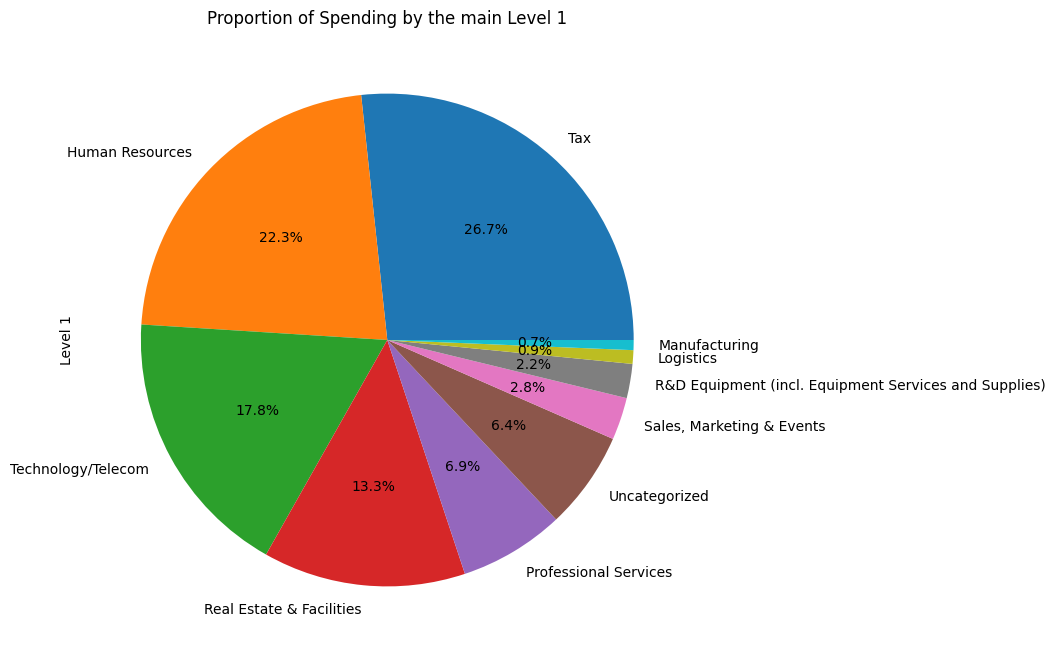

In [48]:
# Contagem de Level 1
level_1_counts = dataframe['Level 1'].value_counts()

# Selecionar os 15 principais Level 1
top_levels_1 = level_1_counts.nlargest(10)

# Restringir o DataFrame aos 15 principais fornecedores
dataframe_filtered = dataframe[dataframe['Level 1'].isin(top_levels_1.index)]

plt.figure(figsize=(8, 8))
dataframe_filtered['Level 1'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of Spending by the main Level 1')
plt.show()

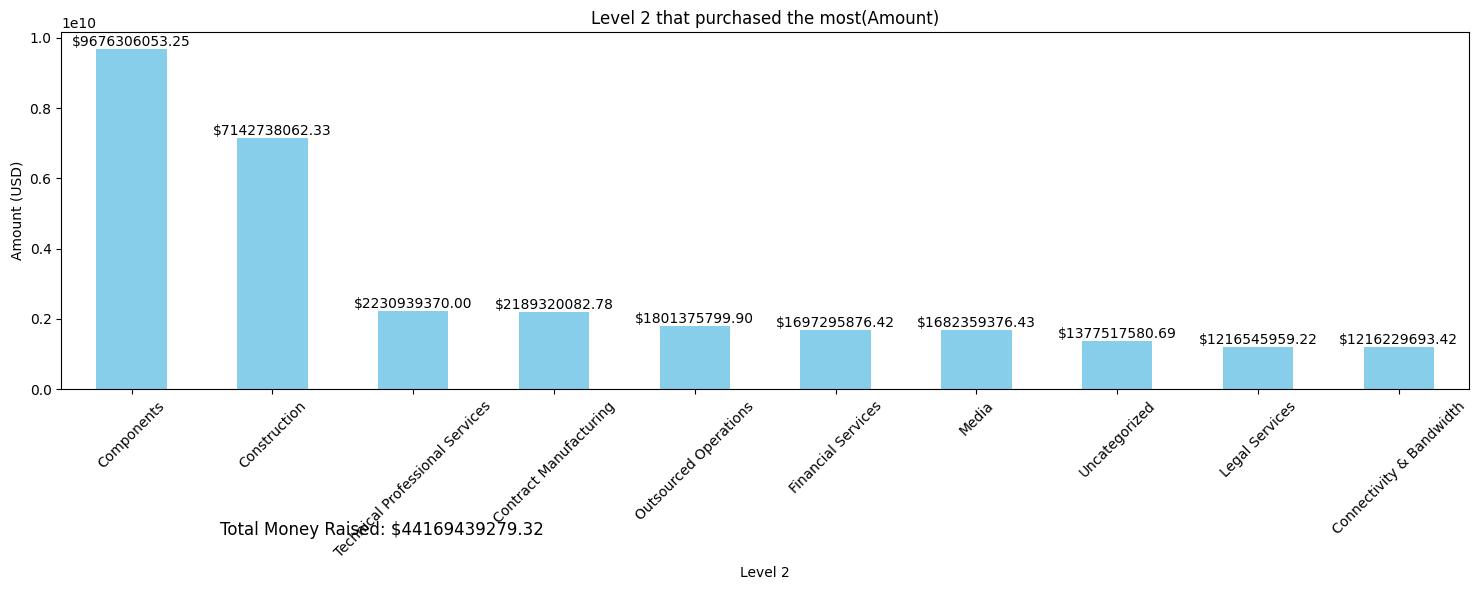

In [49]:
dataframe['Amount (USD)'] = dataframe['Amount (USD)'].replace('[\$,]', '', regex=True).astype(float)

# Soma dos valores em dinheiro
total_raised = dataframe['Amount (USD)'].sum()

# Agrupando por categoria e calculando a soma de dinheiro para cada categoria
raised_by_category = dataframe.groupby('Level 2')['Amount (USD)'].sum().sort_values(ascending=False).head(10)

bar_width = 0.2

# Criando o gráfico de barras para as 10 categorias com maior arrecadação
plt.figure(figsize=(15, 6))
raised_by_category.plot(kind='bar', color='skyblue')
plt.title('Level 2 that purchased the most(Amount)')
plt.xlabel('Level 2')
plt.ylabel('Amount (USD)')
plt.xticks(rotation=45)

# Acrescentando uma marcação para o valor de cada barra no eixo y
for i, v in enumerate(raised_by_category):
    plt.text(i, v, f'${v:.2f}', ha='center', va='bottom')

# Mostrando o total arrecadado
plt.figtext(0.15, 0.1, f'Total Money Raised: ${total_raised:.2f}', fontsize=12)

# Exibindo o gráfico
plt.tight_layout()
plt.show()

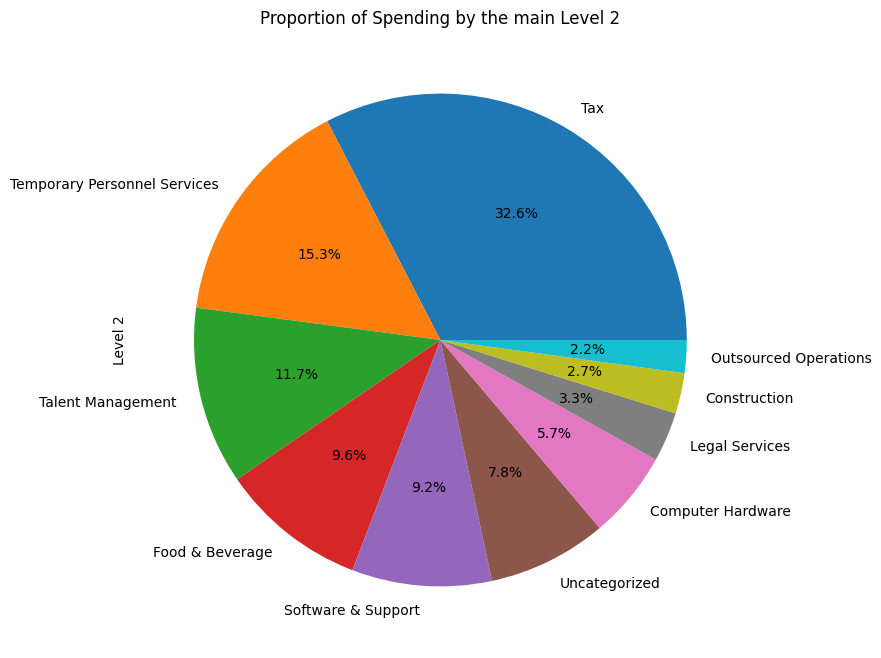

In [50]:
# Contagem de Level 2
level_2_counts = dataframe['Level 2'].value_counts()

# Selecionar os 15 principais Level 2
top_levels_2 = level_2_counts.nlargest(10)

# Restringir o DataFrame aos 15 principais fornecedores
dataframe_filtered = dataframe[dataframe['Level 2'].isin(top_levels_2.index)]

plt.figure(figsize=(8, 8))
dataframe_filtered['Level 2'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of Spending by the main Level 2')
plt.show()

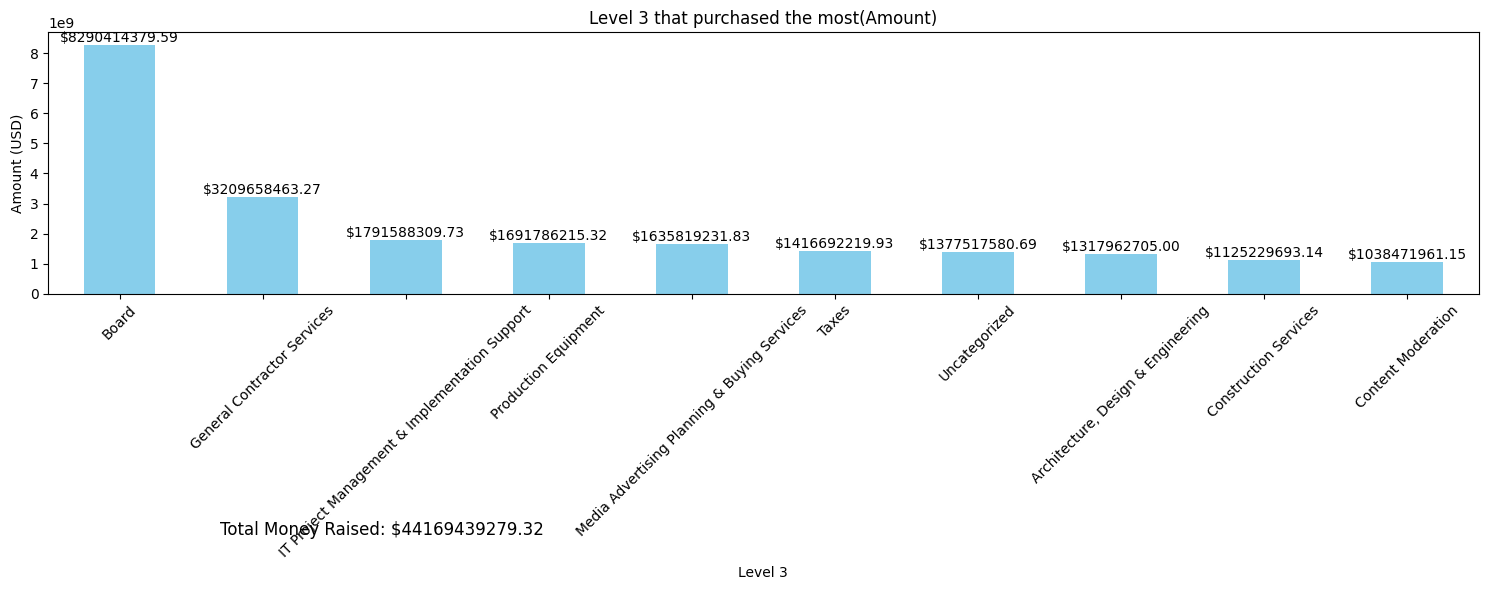

In [51]:
dataframe['Amount (USD)'] = dataframe['Amount (USD)'].replace('[\$,]', '', regex=True).astype(float)

# Soma dos valores em dinheiro
total_raised = dataframe['Amount (USD)'].sum()

# Agrupando por categoria e calculando a soma de dinheiro para cada categoria
raised_by_category = dataframe.groupby('Level 3')['Amount (USD)'].sum().sort_values(ascending=False).head(10)

bar_width = 0.2

# Criando o gráfico de barras para as 10 categorias com maior arrecadação
plt.figure(figsize=(15, 6))
raised_by_category.plot(kind='bar', color='skyblue')
plt.title('Level 3 that purchased the most(Amount)')
plt.xlabel('Level 3')
plt.ylabel('Amount (USD)')
plt.xticks(rotation=45)

# Acrescentando uma marcação para o valor de cada barra no eixo y
for i, v in enumerate(raised_by_category):
    plt.text(i, v, f'${v:.2f}', ha='center', va='bottom')

# Mostrando o total arrecadado
plt.figtext(0.15, 0.1, f'Total Money Raised: ${total_raised:.2f}', fontsize=12)

# Exibindo o gráfico
plt.tight_layout()
plt.show()

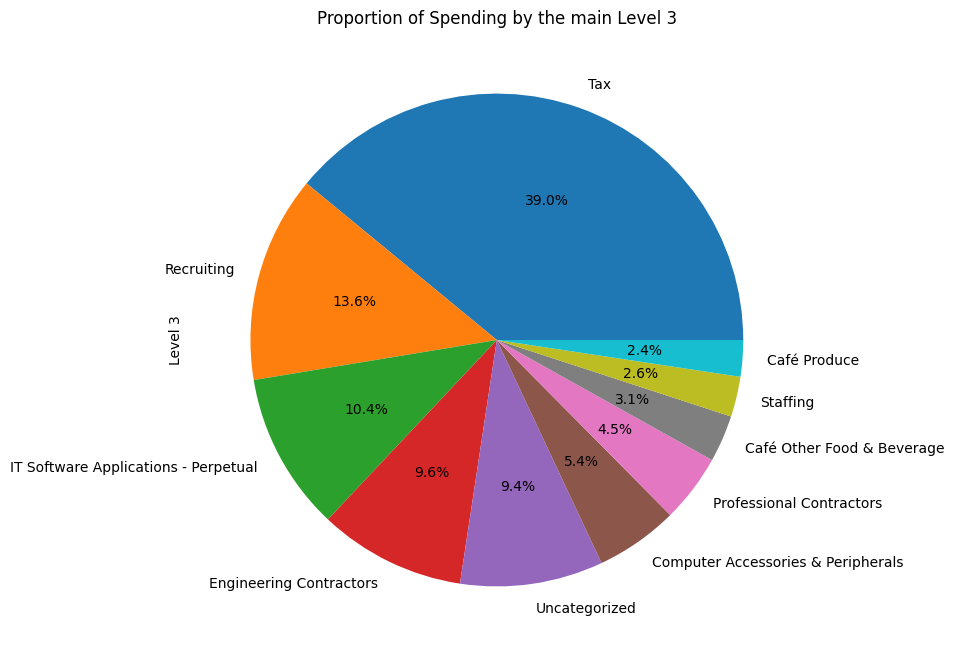

In [52]:
# Contagem de Level 3
level_3_counts = dataframe['Level 3'].value_counts()

# Selecionar os 15 principais Level 3
top_levels_3 = level_3_counts.nlargest(10)

# Restringir o DataFrame aos 15 principais fornecedores
dataframe_filtered = dataframe[dataframe['Level 3'].isin(top_levels_3.index)]

plt.figure(figsize=(8, 8))
dataframe_filtered['Level 3'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of Spending by the main Level 3')
plt.show()